
## Gradient Descent, Linear Regression, and Regularization





## Import Statements

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Normalize function

Add your code in the cell below to normalize the independent variables, making them zero mean and unit variance.

In [ ]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    # YOUR CODE HERE
    # df= pd.DataFrame(X)
    # normalized_df=(df-df.mean())/df.std()
    # print(normalized_df)
    # return normalized_df
    x = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return x
    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [ ]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s
    '''
    # YOUR CODE HERE
    n=[]
    a=[1]
    for i in range(len(X)):
      n.append(a)
    an_array = np.append(X, n, axis=1)
    y= np.dot(an_array,w)
    return y


    # raise NotImplementedError()


In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1])
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [ ]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake.
    This allows us to call all loss functions with the same input format.

    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    t_pred=Prediction(X,w)
    mse = np.mean((t - t_pred)**2)
    return mse



    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [ ]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    # YOUR CODE HERE
    mae = np.sum(np.absolute(t - Prediction(X,w)))/len(t)
    return mae



    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [ ]:

def L2_Loss (X, t, w, lamda=0): # Output should be a single number
    ''' Need to specify what inputs are'''
    # YOUR CODE HERE
    z=w[:-1]
    # print(z)
    t_pred=Prediction(X,w)
    l2 = np.mean((t - t_pred)**2) + lamda *(np.sqrt(np.dot(z,np.transpose(z))))

    return l2


    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [ ]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    # YOUR CODE HERE

    z=w[:-1]
    # print(z)
    t_pred=Prediction(X,w)
    l1 = np.mean((t - t_pred)**2) + lamda *(sum(np.abs(z)))
    return l1
    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [ ]:
def NRMSE_Loss (X, t, w): # Output should be a single number
    # YOUR CODE HERE
    t_pred=Prediction(X,w)
    nrmse=np.sqrt(np.mean((t - t_pred)**2))/np.std(t)
    return nrmse


  # raise NotImplementedError()


In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Loss(X,t,w),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [ ]:
def MSE_Gradient (X, t, w, lamda=0):
    # YOUR CODE HERE
    t_pred=Prediction(X,w)
    n=[]
    a=[1]
    for i in range(len(X)):
      n.append(a)
    an_array = np.append(X, n, axis=1)
    grad= -(np.dot(np.transpose(an_array),(t- t_pred)))
    return grad

    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [ ]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    # YOUR CODE HERE
    t_pred=Prediction(X,w)
    n=[]
    a=[1]
    for i in range(len(X)):
      n.append(a)
    an_array = np.append(X, n, axis=1)
    p=[]
    for i in range(len(t)):
      # print(t[i])
      # print(t_pred[i])
      if (t[i] > t_pred[i] ):
        p.append(1)
      else:
        p.append(-1)

    p= np.transpose(p)
    # print(p)

    mae=np.abs(np.dot(np.transpose(an_array),p))/len(t)

    return mae


    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [ ]:

def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    # t_pred=Prediction(X,w)
    # t_pred=Prediction(X,w)
    z=w[:-1]
    z=np.append(z,0)

    # l2grad= (lamda * w)
    # print(MSE_Gradient (X, t, w))
    l2_grad = MSE_Gradient (X, t, w) + lamda * z/np.linalg.norm(z)


    return l2_grad


    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [ ]:
# from numpy.core.numeric import zeros_like
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    # YOUR CODE HERE
    z=w[:-1]
    z=np.append(z,0)
    a=[]
    for i in range(len(z)):
      if (z[i] > 0):
        a.append(1)
      elif( z[i] < 0):
        a.append(-1)
      else:
        a.append(0)
      b= np.array(a)
    l1_grad= MSE_Gradient (X, t, w) + lamda * b
    return l1_grad



    # raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [ ]:


def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    # YOUR CODE HERE
    # raise NotImplementedError()
    i=0
    train_loss_final = 0
    w_final =w
    while (i <= max_iter):X=np.array([[23,24],[1,2]])
    t=np.array([4,5])
    X_val=np.array([[3,4],[5,6]])
    t_val=np.array([3,4])
    w=np.array([3,2,1])
    w_final= w -  lr * gradfunc(X, t, w, lamda)
    train_loss_final =lossfunc(X, t, w_final, lamda)
    w= w_final
    i+=1

    validation_loss_final=  lossfunc(X_val, t_val, w_final, lamda)
    validation_NRMSE = NRMSE_Loss(X_val, t_val, w_final)
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this

Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient)


NameError: ignored

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient)
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

In [ ]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    # YOUR CODE HERE
  n=[]
  a=[1]
  for i in range(len(X)):
      n.append(a)
  r = np.append(X, n, axis=1)
  w= np.dot(np.linalg.inv(np.dot(np.transpose(r),r) + lamda *np.identity(len(np.dot(np.transpose(r),r)))),np.dot(np.transpose(r),t))
  return w

    #raise NotImplementedError()

In [ ]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#Save the code above this as a RollNo1_RollNo2_1.py file after running the test blocks to make sure there are no errors.

#**... Part 1 ends**
Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file (part 1 and part 2), .py file (part 1 only), and .csv file as a single RollNo1_RollNo2_1.zip file.**


In [ ]:
dataset= pd.read_csv("TempTrain.csv")
index=dataset.index
split_value = int(0.8*len(index))
train = dataset.iloc[:split_value,:]
test = dataset.iloc[split_value:,:]
x_train = train.iloc[:,:-1].values
x_train=Normalize(x_train)
y_train = train.iloc[:,-1].values
# y_train= Normalize(y_train)
x_test = test.iloc[:,:-1].values
x_test=Normalize(x_test)
y_test = test.iloc[:,-1].values

print(len(x_test))

1217


In [ ]:

def Gradient_Descentx (X, t, w, lamda, max_iter, lr, lossfunc, gradfunc): # See output format in 'return' statement
    i=0
    train_loss_final = 0
    w_final =w
    while (i <= max_iter):
        w_final=np.round( w -  lr * gradfunc(X, t, w, lamda),decimals=2)
        w= w_final
        i+=1
    return w_final



In [ ]:
lamda_value = []
bylamda=[]
a=0.001
for i in range(20):
  b=a*10
  lamda_value.append(b)
  a=b

for i in range(len(lamda_value)):
  bylamda.append(1/(lamda_value[i]))

np.random.seed(42)
z=0

w_final=[]
x_value=x_train
y_value = y_train
x_index= x_value.shape
x_column= x_index[1]
w= np.random.rand(x_column+1)
for i in range(len(lamda_value)):
    w_final.append(Gradient_Descentx(x_value, y_value, w, lamda_value[i],100,1e-5 ,L2_Loss,L2_Gradient))

In [ ]:
loss1=[]
for i in range(len(lamda_value)):
    loss1.append(np.round(MSE_Loss (x_train, y_train, w_final[i]) + lamda_value[i] * L2_Loss(x_train, y_train, w_final[i]),decimals= 2))

plt.plot(lamda_value,loss1)
plt.plot(np.min(lamda_value),np.min(loss1),'s')
plt.xlabel("lamda ")
plt.ylabel("lamdaxL2 + MSE")
plt.text(np.min(lamda_value),np.min(loss1),'({}, {})'.format(np.min(lamda_value), np.min(loss1)))
plt.show()


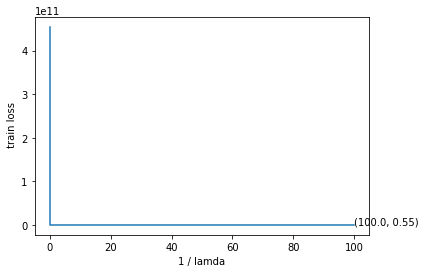

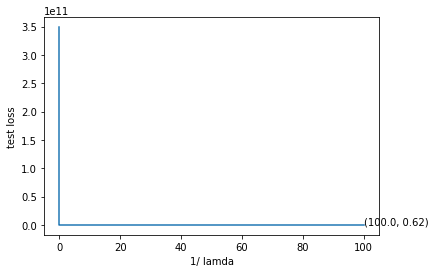

In [ ]:
#by lamda vs nrmse
nrmseloss1=[]
for i in range(len(lamda_value)):
  nrmseloss1.append(np.round(NRMSE_Loss (x_train, y_train, w_final[i]),decimals= 2))

plt.plot(bylamda,nrmseloss1)
plt.xlabel("1 / lamda")
plt.ylabel(" train loss")
plt.text(np.max(bylamda),np.min(nrmseloss1),'({}, {})'.format(np.max(bylamda), np.min(nrmseloss1)))
plt.show()


vx=[]
for i in range(len(lamda_value)):
   vx.append(np.round(NRMSE_Loss (x_test, y_test, w_final[i]),decimals= 2))
plt.plot(bylamda,vx)
plt.xlabel("1/ lamda")
plt.ylabel("test loss")
plt.text(np.max(bylamda),np.min(vx),'({}, {})'.format(np.max(bylamda), np.min(vx)))
plt.show()


In [ ]:
print( "best lamda value",np.min(lamda_value))
print("weights for best lamda ", w_final[0])
print("lowest nrmse for train set " ,np.min(nrmseloss1))
print("lowest nrmse for test set ", np.min(vx))


best lamda value 0.01
weights for best lamda  [ 5.100e-01  4.300e-01 -2.000e-02 -1.500e-01  1.100e+00  1.900e-01
 -4.500e-01  3.300e-01 -3.100e-01 -1.000e-01 -6.600e-01  1.900e-01
 -0.000e+00  1.000e-01 -2.000e-02 -9.000e-02 -1.000e-02  2.000e-02
  1.100e-01  4.000e-02  2.700e-01  2.978e+01]
lowest nrmse for train set  0.55
lowest nrmse for test set  0.62


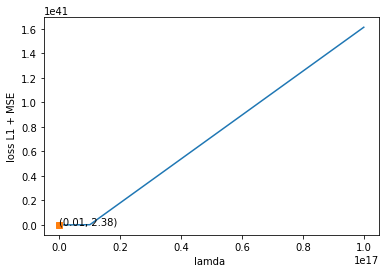

In [ ]:
loss2=[]
for i in range(len(lamda_value)):
    loss2.append(np.round(MSE_Loss (x_train, y_train, w_final[i]) + lamda_value[i] * L1_Loss(x_train, y_train, w_final[i],0),decimals= 3))

plt.plot(lamda_value,loss2)
plt.xlabel("lamda ")
plt.ylabel("loss L1 + MSE")
plt.text(lamda_value[0],loss1[0],'({}, {})'.format(lamda_value[0], loss1[0]))
plt.plot(lamda_value[0],loss1[0],'s')
plt.show()



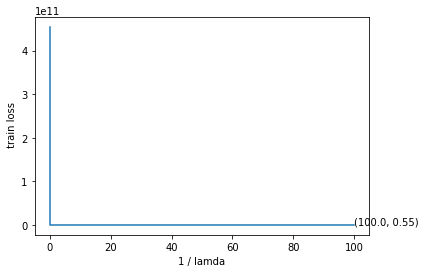

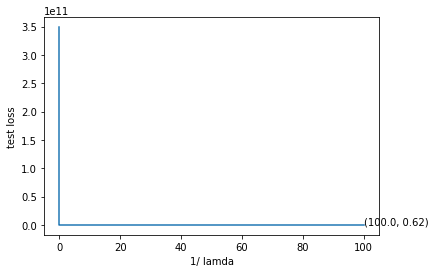

In [ ]:
nrmseloss2=[]
for i in range(len(lamda_value)):
  nrmseloss2.append(np.round(NRMSE_Loss (x_train, y_train, w_final[i]),decimals= 2))

plt.plot(bylamda,nrmseloss1)
plt.xlabel("1 / lamda")
plt.ylabel(" train loss")
plt.text(np.max(bylamda),np.min(nrmseloss1),'({}, {})'.format(np.max(bylamda), np.min(nrmseloss1)))
plt.show()


vx2=[]
for i in range(len(lamda_value)):
   vx2.append(np.round(NRMSE_Loss (x_test, y_test, w_final[i]),decimals= 2))
plt.plot(bylamda,vx2)
plt.xlabel("1/ lamda")
plt.ylabel("test loss")
plt.text(np.max(bylamda),np.min(vx),'({}, {})'.format(np.max(bylamda), np.min(vx2)))
plt.show()


In [ ]:
print( "best lamda value",np.min(lamda_value))
print("weights for best lamda ", w_final[0])
print("lowest nrmse for train set " ,np.min(nrmseloss2))
print("lowest nrmse for test set ", np.min(vx2))

best lamda value 0.01
weights for best lamda  [ 5.100e-01  4.300e-01 -2.000e-02 -1.500e-01  1.100e+00  1.900e-01
 -4.500e-01  3.300e-01 -3.100e-01 -1.000e-01 -6.600e-01  1.900e-01
 -0.000e+00  1.000e-01 -2.000e-02 -9.000e-02 -1.000e-02  2.000e-02
  1.100e-01  4.000e-02  2.700e-01  2.978e+01]
lowest nrmse for train set  0.55
lowest nrmse for test set  0.62


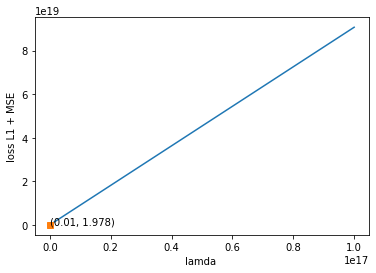

In [ ]:
w_in=[]

for i in range(len(lamda_value)):
    w_in.append(Pseudo_Inverse (x_train, y_train, lamda_value[i]))
loss3=[]
for i in range(len(w_in)):
  loss3.append(np.round(MSE_Loss (x_train, y_train, w_in[i]) + lamda_value[i] * L1_Loss(x_train, y_train, w_in[i],0),decimals= 3))

plt.plot(lamda_value,loss3)
plt.xlabel("lamda ")
plt.ylabel("loss L1 + MSE")
plt.text(lamda_value[0],loss3[0],'({}, {})'.format(lamda_value[0], loss3[0]))
plt.plot(lamda_value[0],loss3[0],'s')
plt.show()


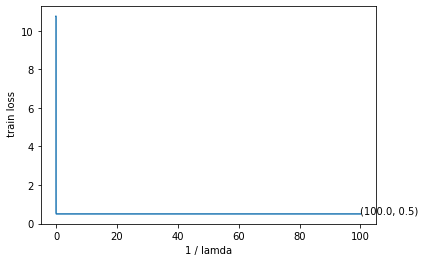

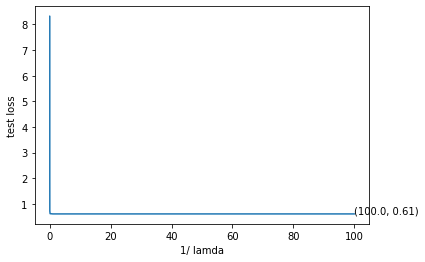

In [ ]:
nrmseloss3=[]
for i in range(len(lamda_value)):
  nrmseloss3.append(np.round(NRMSE_Loss (x_train, y_train, w_in[i]),decimals= 2))

plt.plot(bylamda,nrmseloss3)
plt.xlabel("1 / lamda")
plt.ylabel(" train loss")
plt.text(np.max(bylamda),np.min(nrmseloss3),'({}, {})'.format(np.max(bylamda), np.min(nrmseloss3)))
plt.show()


vx3=[]
for i in range(len(lamda_value)):
   vx3.append(np.round(NRMSE_Loss (x_test, y_test, w_in[i]),decimals= 2))
plt.plot(bylamda,vx3)
plt.xlabel("1/ lamda")
plt.ylabel("test loss")
plt.text(np.max(bylamda),np.min(vx),'({}, {})'.format(np.max(bylamda), np.min(vx3)))
plt.show()

In [ ]:
print( "best lamda value",np.min(lamda_value))
print("weights for best lamda ", w_in[0])
print("lowest nrmse for train set " ,np.min(nrmseloss3))
print("lowest nrmse for test set ", np.min(vx3))

best lamda value 0.01
weights for best lamda  [ 3.51118095e-01  6.12124582e-02  5.71705089e-01 -1.54896332e-01
  1.81437952e+00  1.14198065e-01 -3.42027693e-01  2.66291181e-01
 -4.15923664e-01 -1.19707596e-01 -2.01510030e-01 -3.39345456e-01
 -1.08702984e-01  2.39989031e-01 -2.21391740e-02  1.78022703e-02
 -8.81040749e-02 -1.10146360e-01 -2.50705073e-01  2.81350538e-01
  9.88956669e-02  2.99853032e+01]
lowest nrmse for train set  0.5
lowest nrmse for test set  0.61


In [ ]:
pr_file=np.round(Prediction (x_test, w_final[0]),decimals= 2)
np.savetxt('213070028_213070029.csv',pr_file,fmt='%f')
print(Prediction ([x_test[1216]], w_final[0])) #y value from the csv file is 21.1

[20.54509479]


#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code):
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code):